## Задание 

<ol>
    <li>Выберите набор данных (датасет) для решения задачи классификации или регресии.</li>
    <li>В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.</li>
    <li>С использованием метода train_test_split разделите выборку на обучающую и тестовую.</li>
    <li>Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.</li>
    <li>Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.</li>
    <li>Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.</li>
    <li>Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.</li>
    <li>Постройте кривые обучения и валидации.</li>
</ol>

## Подключение библиотек 

In [152]:
import numpy as np

from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston


from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import 
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 


from sklearn.model_selection import learning_curve, validation_curve

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Набор данных 

Набор данных содержит в себе информацию о пациентах и целевым признаком является наличие болезни сердца.

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строки и {} столбцов.'.format(row_number, column_number))

Данный датасет содержит 303 строки и 14 столбцов.


## Обработка пропусков в данных 

In [3]:
null_columns = {}
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        null_columns[col] = column_type
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

In [4]:
for col in df.columns:
    column_type = df[col].dtype
    print('{} - тип: {}'.format(col, column_type))

age - тип: int64
sex - тип: int64
cp - тип: int64
trestbps - тип: int64
chol - тип: int64
fbs - тип: int64
restecg - тип: int64
thalach - тип: int64
exang - тип: int64
oldpeak - тип: float64
slope - тип: int64
ca - тип: int64
thal - тип: int64
target - тип: int64


Удаление или заполнение пропусков, не требуется, так как в датасете отсутствуют пустые значения. Кодирование категориальных признаков также не требуется, так как они отсутствуют.

In [5]:
grouped_df = (df.groupby('target').count()
              .reset_index()[['target','age']])
grouped_df.columns = ['target','count']
grouped_df['summ'] = df.shape[0]
grouped_df['percent'] = round(grouped_df['count'] / grouped_df['summ'] * 100,2)
grouped_df

,target,count,summ,percent
0,0,138,303,45.54
1,1,165,303,54.46


## Разделение выборки на обучающую и тестовую 

In [6]:
from sklearn.model_selection import train_test_split

df_x = df.loc[:, df.columns != 'target']
df_y = df['target']
train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(df_x,df_y,
                                     test_size=0.3, random_state=1)

In [14]:
row_number = train_x_df.shape[0]
column_number = train_x_df.shape[1]

print('Тренировочный датасет содержит {} строк и {} столбцов.'.format(row_number, column_number))

Тренировочный датасет содержит 212 строк и 13 столбцов.


In [15]:
row_number = test_x_df.shape[0]
column_number = test_x_df.shape[1]

print('Тестовый датасет содержит {} строк и {} столбцов.'.format(row_number, column_number))

Тестовый датасет содержит 91 строк и 13 столбцов.


## Обучение модели с произвольным гиперпараметром 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# 2 ближайших соседа
cl_2 = KNeighborsClassifier(n_neighbors=2)
cl_2.fit(train_x_df,train_y_df)
target_2 = cl_2.predict(test_x_df)

## Оценка качества модели

In [20]:
from sklearn.metrics import accuracy_score, \
confusion_matrix, plot_confusion_matrix, balanced_accuracy_score

### Accuracy 

In [21]:
balanced_accuracy_score(test_y_df, target_2)

0.5214634146341464

### Матрица ошибок 

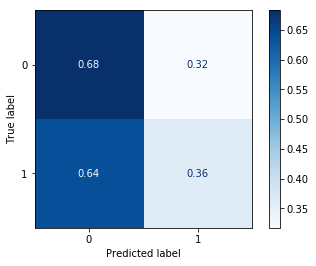

In [23]:
import matplotlib.pyplot as plt
plot_confusion_matrix(cl_2, test_x_df, test_y_df, 
                      cmap=plt.cm.Blues, normalize='true')

### ROC-кривая 

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
fpr, tpr, thresholds = roc_curve(test_y_df, target_2, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.31707317, 1.        ]),
 array([0.  , 0.36, 1.  ]),
 array([2, 1, 0]))

In [28]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

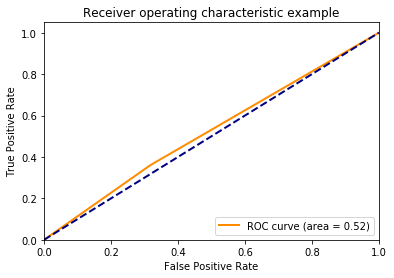

In [29]:
draw_roc_curve(test_y_df, target_2, pos_label=1, average='micro')

## Кросс-валидация 

In [34]:
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit\
, cross_val_score

In [37]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         df_x, df_y, scoring='accuracy', 
                         cv=kf)
round(scores.mean(),2)

0.46

In [38]:
kf = RepeatedKFold(n_splits=3, n_repeats=2)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         df_x, df_y, scoring='accuracy', 
                         cv=kf)
round(scores.mean(),2)

0.58

In [39]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         df_x, df_y, scoring='accuracy', 
                         cv=kf)
round(scores.mean(),2)

0.49

## Подбор гиперпараметра 

In [41]:
import numpy as np
n_range = np.array(range(1,100,1))
tuned_parameters = [{'n_neighbors': n_range}]

In [43]:
from sklearn.model_selection import GridSearchCV

clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, 
                      cv=RepeatedKFold(n_splits=3, n_repeats=2), scoring='accuracy')
clf_gs.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             pre_dispat

In [45]:
'Наилучшее значение параметра k - ' + str(clf_gs.best_params_['n_neighbors'])

'Наилучшее значение параметра k - 35'

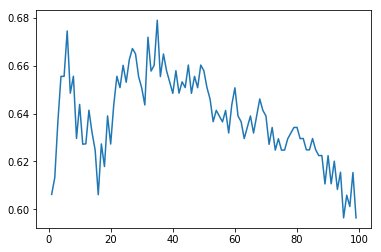

In [46]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

## Обучение модели при оптимальном параметре 

In [47]:
clf_gs.best_estimator_.fit(train_x_df, train_y_df)
target_final = clf_gs.best_estimator_.predict(test_x_df)

In [48]:
'Точность при оптимальном параметре - ' + \
str(round(accuracy_score(test_y_df, target_final),2))

'Точность при оптимальном параметре - 0.62'

In [49]:
'Точность при случайно выбранном параметре - ' + \
str(round(balanced_accuracy_score(test_y_df, target_2),2))

'Точность при случайно выбранном параметре - 0.52'

## Кривые обучения и валидации 

In [52]:
from sklearn.model_selection import learning_curve, validation_curve

In [55]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

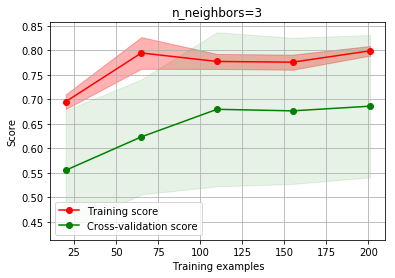

In [56]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=3), 'n_neighbors=3', 
                    train_x_df, train_y_df, cv=20)

In [57]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

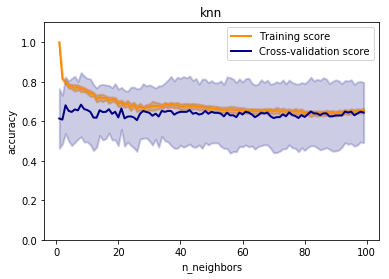

In [58]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      train_x_df, train_y_df, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")